# SDCTA - RTFH Analysis

### Setup

In [6]:
import pandas as pd

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('../data/processed/expenditures_and_PIT.csv')
cities = data['City'].unique()
data = pd.get_dummies(data, columns=['Program', 'City'], prefix='', prefix_sep='')
X = data.drop(columns=['Total PEH', 'Unsheltered PEH', 'Population', 
                       'PEH Per 100,000', 'Unsheltered Per 100,000', 'Grantee', 'Amount', 'ExpenditureType'])
y = data['Unsheltered Per 100,000']  

feature_names = X.columns

### LASSO Regression

In [ ]:
# standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lasso_cv_unstandardized = LassoCV(cv=5, max_iter=10000, random_state=42)
lasso_cv_unstandardized.fit(X, y)

lasso_cv_standardized = LassoCV(cv=5, max_iter=10000, random_state=42)
lasso_cv_standardized.fit(X_scaled, y)

LassoCV(cv=5, max_iter=10000, random_state=42)

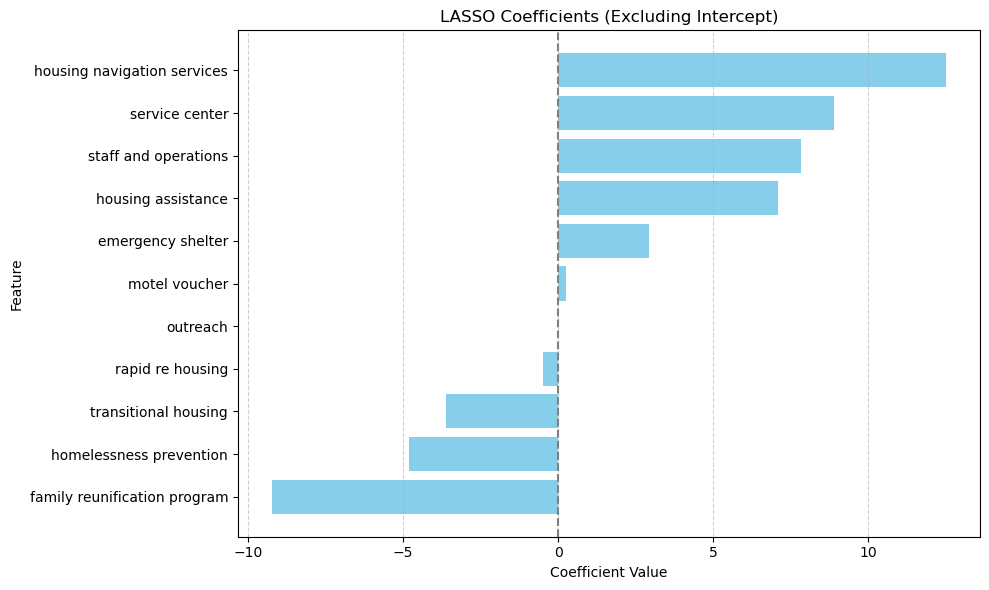

In [34]:
coef_unstandardized = lasso_cv_unstandardized.coef_

# Create a DataFrame for easy plotting
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coef_unstandardized
})

coef_df = coef_df.loc[~coef_df['Feature'].isin(cities)]
coef_df = coef_df.loc[coef_df['Feature'] != 'Year']

# Filter out zero coefficients (if needed) and sort by absolute value
coef_df = coef_df[coef_df['Coefficient'] != 0].sort_values(by='Coefficient')

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.axvline(0, color='gray', linestyle='--')  # Add a line at x=0 for reference
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('LASSO Coefficients (Excluding Intercept)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

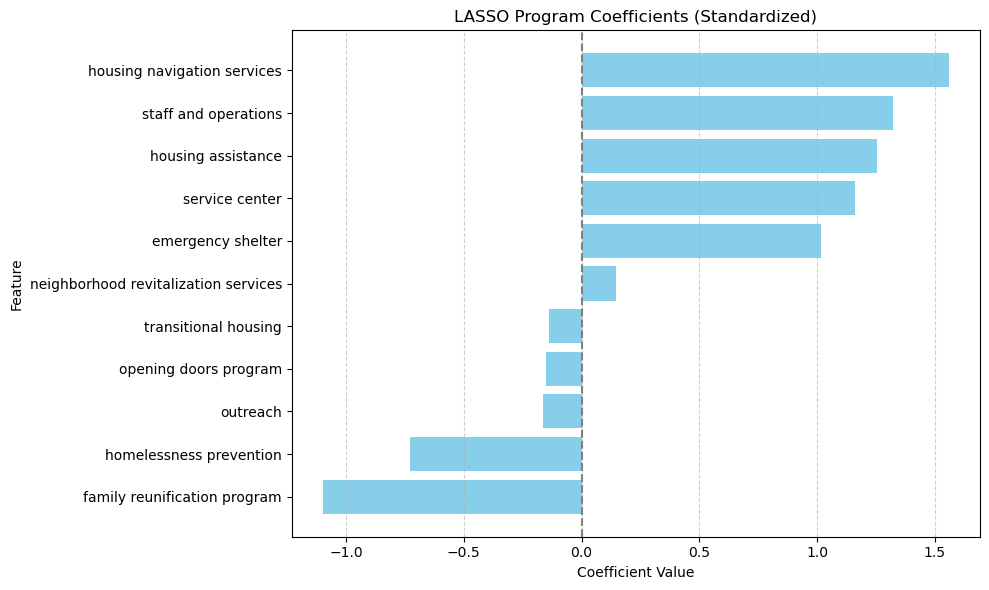

In [37]:
coef_standardized = lasso_cv_standardized.coef_

# Create a DataFrame for easy plotting
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coef_standardized
})

coef_df = coef_df.loc[~coef_df['Feature'].isin(cities)]
coef_df = coef_df.loc[coef_df['Feature'] != 'Year']

# Filter out zero coefficients (if needed) and sort by absolute value
coef_df = coef_df[coef_df['Coefficient'] != 0].sort_values(by='Coefficient')

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.axvline(0, color='gray', linestyle='--')  # Add a line at x=0 for reference
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('LASSO Program Coefficients (Standardized)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Conclusion

Based on the visuals above we can say based on the LASSO Regression that the top 2 programs for decreasing unsheltered people experienceing homelessness is "family reunification program" and "homelessness prevention". The unstandardized and standardized LASSO regressions are matched for these programs which allows us to have both easier interpretation, and statistical integrity.

It is important to note that LASSO might not be the best model type because the L1 regularization has the capability of flipping the sign of coefficients as well as their values.

### Acknoledgement of use of Generative AI

During the preparation of this report the authors utilized ChatGPT. After using this tool, the authors reviewed the content as needed and take full responsibility for the content of the report.